# Quiz 6: Image Classification

Now you are ready!  We are going do four tasks in this assignment.    There are several results you need to gather along the way to enter into the quiz after this reading.

**Computing summary statistics of the data**
</br>Sketch summaries are techniques for computing summary statistics of data very quickly.  In Turi Create, SArrays include a method **.summary()**
which computes such summary statistics.  

Using the training data, compute the summary of the ‘label’ column and interpret the results.  What’s the least common category in the training data?

In [2]:
import turicreate

In [3]:
image_train = turicreate.SFrame('~/Courses/u-wash-machine-learning/machine-learning-case-study/data/image_train_data/')

In [9]:
image_test = turicreate.SFrame('~/Courses/u-wash-machine-learning/machine-learning-case-study/data/image_test_data/')

In [4]:
image_train['label'].summary()


+------------------+-------+----------+
|       item       | value | is exact |
+------------------+-------+----------+
|      Length      |  2005 |   Yes    |
| # Missing Values |   0   |   Yes    |
| # unique values  |   4   |    No    |
+------------------+-------+----------+

Most frequent items:
+------------+-------+
|   value    | count |
+------------+-------+
|    cat     |  509  |
|    dog     |  509  |
| automobile |  509  |
|    bird    |  478  |
+------------+-------+


**Creating category-specific image retrieval models**
<br>In most retrieval tasks, the data we have is unlabeled, thus we call these unsupervised learning problems.  However, we have labels in this image dataset, and will use these to create one model for each of the 4 image categories, {‘dog’,’cat’,’automobile’,bird’}.  To start, follow these steps:

1. Split the SFrame with the training data into 4 different SFrames.  Each of these will contain data for 1 of the 4 categories above.  Hint: if you use a logical filter to select the rows where the ‘label’ column equals ‘dog’, you can create an SFrame with only the data for images labeled ‘dog’.

2. Create a nearest neighbor model using the 'deep_features' as the features, but this time create one such model for each category, using the corresponding subset of the training_data.  You can call the model with the ‘dog’ data the dog_model, the one with the ‘cat’ data the cat_model, as so on.

You now have a nearest neighbors model that can find the nearest ‘dog’ to any image you give it, the dog_model; one that can find the nearest ‘cat’, the cat_model; and so on.

What is the nearest ‘cat’ labeled image in the training data to the cat image above (the first image in the test data)? Save this result.

In [29]:
dog = image_train[image_train['label']=='dog']
cat = image_train[image_train['label']=='cat']
auto = image_train[image_train['label']=='automobile']
bird = image_train[image_train['label']=='bird']

In [7]:
dog_model = turicreate.nearest_neighbors.create(dog,
                                               features = ['deep_features'],
                                               label = 'id')

cat_model = turicreate.nearest_neighbors.create(cat,
                                               features = ['deep_features'],
                                               label = 'id')

auto_model = turicreate.nearest_neighbors.create(auto,
                                               features = ['deep_features'],
                                               label = 'id')

bird_model = turicreate.nearest_neighbors.create(bird,
                                               features = ['deep_features'],
                                               label = 'id')

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

In [10]:
cat_model.query(image_test[0:1])

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 6.063ms      |

| Done         |         | 100         | 98.969ms     |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
0,16289,34.62371920804245,1
0,45646,36.00687992842462,2
0,32139,36.52008134363789,3
0,25713,36.754850252057054,4
0,331,36.87312281675268,5


In [20]:
def get_images_from_ids(query_result):
    return image_train.filter_by(query_result['reference_label'],'id')

,SArray
0,

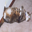

In [23]:
image_train[image_train['id']==16289]['image'].explore()

What is the nearest ‘dog’ labeled image in the training data to the cat image above (the first image in the test data)? Save this result.

In [24]:
dog_model.query(image_test[0:1])

Starting pairwise querying.

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
0,16976,37.464262878423774,1
0,13387,37.56668321685285,2
0,35867,37.60472670789396,3
0,44603,37.70655851529755,4
0,6094,38.511325490739715,5


| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 12.625ms     |

| Done         |         | 100         | 81.034ms     |

+--------------+---------+-------------+--------------+

,SArray
0,

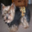

In [25]:
image_train[image_train['id']==16976]['image'].explore()

**A simple example of nearest-neighbors classification**
</br>
When we queried a nearest neighbors model, the ‘distance’ column in the table above shows the computed distance between the input and each of the retrieved neighbors.  In this question, you will use these distances to perform a classification task, using the idea of a nearest-neighbors classifier.  

1. For the first image in the test data (image_test[0:1]), which we used above, compute the mean distance between this image at its 5 nearest neighbors that were labeled ‘cat’ in the training data (similarly to what you did in the previous question).  Save this result.

2. Similarly, for the first image in the test data (image_test[0:1]), which we used above, compute the mean distance between this image at its 5 nearest neighbors that were labeled ‘dog’ in the training data (similarly to what you did in the previous question).  Save this result.

3. On average, is the first image in the test data closer to its 5 nearest neighbors in the ‘cat’ data or in the ‘dog’ data?  (In a later course, we will see that this is an example of what is called a k-nearest neighbors classifier, where we use the label of neighboring points to predict the label of a test point.)

In [26]:
cat_model.query(image_test[0:1])['distance'].mean()

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

36.15573070978294

| 0            | 1       | 0.196464    | 8.319ms      |

| Done         |         | 100         | 56.389ms     |

+--------------+---------+-------------+--------------+

In [27]:
dog_model.query(image_test[0:1])['distance'].mean()

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

37.77071136184156

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 8.866ms      |

| Done         |         | 100         | 62.099ms     |

+--------------+---------+-------------+--------------+

**[Challenging Question]  Computing nearest neighbors accuracy using SFrame operations**
<br>A nearest neighbor classifier predicts the label of a point as the most common label of its nearest neighbors.  In this question, we will measure the accuracy of a 1-nearest-neighbor classifier, i.e., predict the output as the label of the nearest neighbor in the training data.  Although there are simpler ways of computing this result, we will go step-by-step here to introduce you to more concepts in nearest neighbors and SFrames, which will be useful later in this Specialization.  

1. For this question, you will need the nearest neighbors models you learned above on the training data, i.e., the dog_model, cat_model, automobile_model and bird_model.
2. Above, you split the train data SFrame into one SFrame for images labeled ‘dog’, another for those labeled ‘cat’, etc.  Now, do the same for the test data. 

In [30]:
dog_t = image_test[image_test['label']=='dog']
cat_t = image_test[image_test['label']=='cat']
auto_t = image_test[image_test['label']=='automobile']
bird_t = image_test[image_test['label']=='bird']

Create an SFrame with the distances from ‘dog’ test examples to the respective nearest neighbors in each class in the training data:  The ‘distance’ column in dog_cat_neighbors above contains the distance between each ‘dog’ image in the test set and its nearest ‘cat’ image in the training set.  The question we want to answer is how many of the test set ‘dog’ images are closer to a ‘dog’ in the training set than to a ‘cat’, ‘automobile’ or ‘bird’.  So, next we will create an SFrame containing just these distances per data point.  The goal is to create an SFrame called dog_distances with 4 columns:

1. dog_distances[‘dog-dog’] ---- storing  dog_dog_neighbors[‘distance’]
2. dog_distances[‘dog-cat’] ---- storing  dog_cat_neighbors[‘distance’]
3. dog_distances[‘dog-automobile’] ---- storing  dog_automobile_neighbors[‘distance’]
4. dog_distances[‘dog-bird’] ---- storing  dog_bird_neighbors[‘distance’]

In [33]:
dog_cat_neighbors = cat_model.query(dog_t, k=1)
dog_dog_neighbors = dog_model.query(dog_t, k=1)
dog_auto_neighbors = auto_model.query(dog_t, k=1)
dog_bird_neighbors = bird_model.query(dog_t, k=1)

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 4

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 127000  | 24.9509     | 307.137ms    |

| Done         | 509000  | 100         | 343.488ms    |

+--------------+---------+-------------+--------------+

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 4

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 127000  | 24.9509     | 300.146ms    |

| Done         | 509000  | 100         | 339.227ms    |

+--------------+---------+-------------+--------------+

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 4

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 128000  | 25.1473     | 377.089ms    |

| Done         | 509000  | 100         | 394.493ms    |

+--------------+---------+-------------+--------------+

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 4

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 119000  | 24.8954     | 367.611ms    |

| Done         | 478000  | 100         | 412.669ms    |

+--------------+---------+-------------+--------------+

In [36]:
dog_distances = turicreate.SFrame({'dog_automobile': dog_auto_neighbors['distance'],
                              'dog_bird': dog_bird_neighbors['distance'],
                              'dog_cat': dog_cat_neighbors['distance'],
                              'dog_dog': dog_dog_neighbors['distance']
                             })

In [37]:
dog_distances

dog_automobile,dog_bird,dog_cat,dog_dog
41.95797614571203,41.75386473035126,36.419607706754384,33.47735903726335
46.00213318067788,41.3382958924861,38.83532688735542,32.84584956840554
42.946229069238804,38.615759085289056,36.97634108541546,35.03970731890584
41.68660600484793,37.08922699538214,34.575007291446106,33.90103276968193
39.22696649347584,38.27228869398105,34.77882479101661,37.484925090925636
40.58451176980721,39.146208923590486,35.11715782924591,34.94516534398124
45.10673529610854,40.523040105962316,40.60958309132649,39.095727834463545
41.32211409739762,38.19479183926956,39.90368673062214,37.76961310322034
41.82446549950164,40.156713166131446,38.067470016821176,35.10891446032838
45.497692940110376,45.55979626027668,42.72587329506032,43.242283258453455


**Accuracy of predicting dog in the test data**
<br>Using the work you did in this question, what is the accuracy of the 1-nearest neighbor classifier at classifying ‘dog’ images from the test set? Save this result to answer the quiz at the end.

In [38]:
def is_dog_correct(row):  
    if row['dog_dog'] <= min(row.values()):     
        return 1    
    else:        
        return 0

In [39]:
dog_distances.apply(is_dog_correct).sum()/float(len(dog_distances))

0.678